In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture 

/home/romil/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/romil/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [11]:
data = pd.read_csv('data.csv', names=['variance','skewness','curtosis','entropy','target'])

In [31]:
data

,variance,skewness,curtosis,entropy,target
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


In [32]:
data.target.value_counts()

0    762
1    610
Name: target, dtype: int64

In [16]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
target      0
dtype: int64

# Considering only two features

In [130]:
x = data[['variance','skewness']]
x.dtypes

variance    float64
skewness    float64
dtype: object

/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


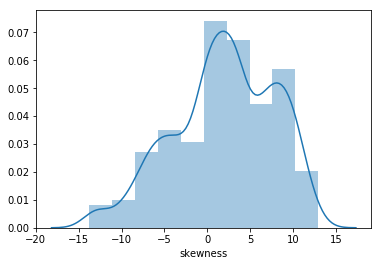

In [131]:
sns.distplot(x['skewness'],bins = 10)
#plt.scatter('variance',data = x)

In [106]:
gmm = GaussianMixture(n_components = 2)

In [107]:
gmm.fit(x)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [108]:
labels = gmm.predict(x)

/home/romil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


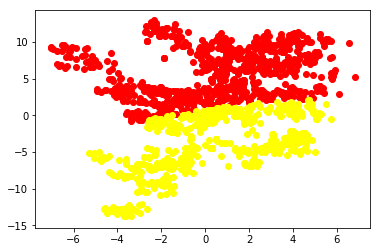

In [109]:
x['labels']= labels 
x0 = x[x['labels']== 0] 
x1 = x[x['labels']== 1]  
  
# plot three clusters in same plot 
plt.scatter(x0['variance'], x0['skewness'], c ='r') 
plt.scatter(x1['variance'], x1['skewness'], c ='yellow') 

In [110]:
labels

array([0, 0, 1, ..., 1, 1, 1])

In [111]:
data.target

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1342    1
1343    1
1344    1
1345    1
1346    1
1347    1
1348    1
1349    1
1350    1
1351    1
1352    1
1353    1
1354    1
1355    1
1356    1
1357    1
1358    1
1359    1
1360    1
1361    1
1362    1
1363    1
1364    1
1365    1
1366    1
1367    1
1368    1
1369    1
1370    1
1371    1
Name: target, Length: 1372, dtype: int64

In [112]:
((data.target.values == labels).sum())/data.shape[0]

0.5903790087463557

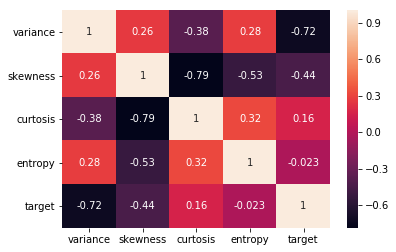

In [113]:
sns.heatmap(data.corr(),annot=True)

# Taking whole set of features for training

In [119]:
x = data.drop('target',axis =1)

In [120]:
gmm = GaussianMixture(n_components = 2)

In [121]:
gmm.fit(x)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [122]:
labels = gmm.predict(x)

In [123]:
(((data.target.values == labels).sum())/data.shape[0])*100

53.134110787172006